### Midterm
### Prepared By: Woon Kim
### UNI: wk2371
### Course: ACTU 5841
### Date: March 10 2022

In [125]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

from sklearn.neighbors import KNeighborsClassifier

In [126]:
#Question 1

N = 10 
X1, X2 = grid = np.meshgrid(np.arange(0, N), np.arange(0, N)) 

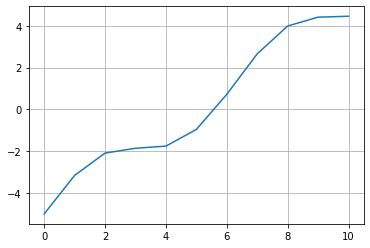

In [187]:
X1 = np.arange(0,11,1)
X2 = np.arange(0,11,1)

plt.plot(X1+np.sin(X2)-5)
plt.grid()

plt.show()

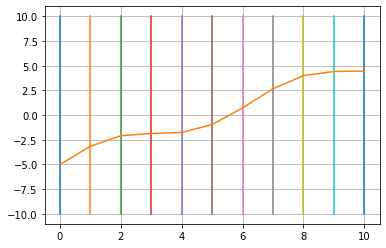

In [186]:
X1 = np.arange(0,11,1)
X2 = np.arange(0,11,1)

xx, xx2 = np.meshgrid(np.arange(0, 11, 1), np.arange(-10, 11, 1))
plt.plot(xx,xx2)
plt.plot(X1+np.sin(X2)-5)
plt.grid()

plt.show()

In [129]:
#probability that a point is greater than the boundary (assume 50%)
Y_train = [[X1,X2]]
Pr_1 = (0.8+(X1+X2)*0.01)*0.5
Pr_2 = 1-Pr_1


In [130]:
#Question 2
#1-E(maxPr(Y=k|X))
1-max(Pr_1,Pr_2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [131]:
#Question 3
import random
x1 = np.arange(0,11,0.2)
x2 = np.arange(0,11,0.2)

Y_sample = random.choices(population=[[1], [2]], weights=[0.5, 0.5], k=100)

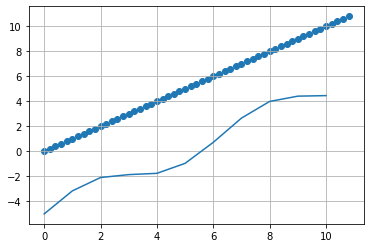

In [132]:
X1 = np.arange(0,11,1)
X2 = np.arange(0,11,1)
plt.plot(X1+np.sin(X2)-5)
plt.scatter(x1,x2)
plt.grid()

plt.show()

In [189]:
#fit full training set with a surface via KNN
X = np.hstack((x1.ravel().reshape(-1,1), x2.ravel().reshape(-1,1))) 
y = Y_sample
clas = KNeighborsClassifier(n_neighbors = 5).fit(X,y)
y_hat = reg.predict(X).reshape(2*N,2*N)

print(clas.predict([[0,0]]))
print(clas.kneighbors([[0,0]])[0]) #distance, index
print(clas.kneighbors([[0,0]])[1]) #distance, index


ax.scatter(x1, x2, y, marker = 'o', s = 10, color = 'g')
ax.plot_wireframe(grid[0], grid[1], y_hat, color = 'blue',  rstride=1, cstride=1, linewidth = 2)
ax.plot_wireframe(grid[0], grid[1], y_truth, color = 'red',  rstride=1, cstride=1, linewidth = 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [55, 100]

In [144]:
#Question 4
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
error = []

df = pd.DataFrame(list(zip(x1, x2, Y_sample)),
                  columns = ['x1', 'x2', 'y'])

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    for train, test in kf.split(df):
        X_train = df.iloc[train].loc[:, df.columns != 'y']
        X_train = X_train.squeeze()
        X_test = df.iloc[test].loc[:, df.columns != 'y']
        y_train = df.iloc[train].loc[:,'y']
        y_test = df.iloc[test].loc[:,'y']

        knn.fit(X_train, y_train)
        y_hat = knn.predict(X_test)
        
        error.append(np.mean(y_hat != y_test))
    
    kf_error = (1/5) * np.sum(error)
    
    
    


ValueError: Unknown label type: 'unknown'